<a href="https://colab.research.google.com/github/rajan-dhinoja/Machine_Learning/blob/main/Part-3%20-%20Classification/Section%2020%20-%20Random%20Forest%20Classification/random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classification Tutorial...**

# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
dataset = pd.DataFrame(pd.read_csv('social_network_ads.csv'))
dataset.head()
# dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("> No Categorical Columns Found... \n")
else:
  print("-> Categorical Columns: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("> No Numerical Columns Found...")
else:
  print("-> Numerical Columns: \n", numerical_cols)

> No Categorical Columns Found... 

-> Numerical Columns: 
 Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [4]:
print("> Shape of the Dataset: \n", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
print(dataset.describe().map(lambda x: round(x, 4)))

> Shape of the Dataset: 
 (400, 3) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None 

> Statistical summary of the Dataset:
         Age  EstimatedSalary  Purchased
count 400.00           400.00     400.00
mean   37.66        69,742.50       0.36
std    10.48        34,096.96       0.48
min    18.00        15,000.00       0.00
25%    29.75        43,000.00       0.00
50%    37.00        70,000.00       0.00
75%    46.00        88,000.00       1.00
max    60.00       150,000.00       1.00


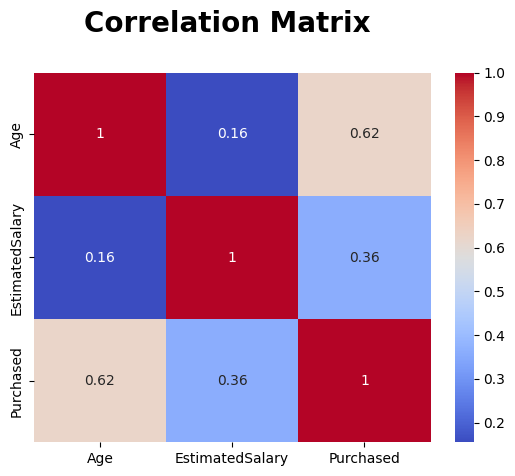

In [5]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

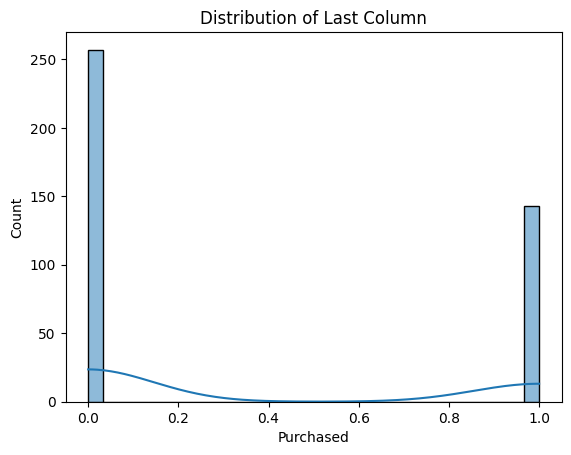

In [6]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
# if dataset.duplicated().any():
#   dataset.drop_duplicates(inplace=True)
#   print("Duplicate Data(or Identical Rows) found and Removed...")
# else:
#     print("No Duplicate Data(or Identical Rows) found...")

### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

      print("\n")
      print("New Data with replaced missing values: \n", dataset)
else:
    print("No missing data found.")



No missing data found.


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
for col in dataset.columns:
  # Get value counts and convert to DataFrame with column name
  # .reset_index(name='Counts: '): This converts the Series into a DataFrame and names the count column as 'Counts: '.
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  # Transpose and print with formatting
  print(f"Column: \t'{col}'")
  # .to_string(header=False): This converts the transposed DataFrame to a string for printing and removes the header row.
  print(value_counts_dataset.T.to_string(header=False), "\n")


Column: 	'Age'
Unique Values:   35  37  26  41  42  39  40  48  47  27  38  28  36  46  31  30  49  29  33  32  24  59  19  45  20  60  34  23  52  25  58  53  57  22  18  21  50  54  55  56  51  43  44
Counts:          32  20  16  16  16  15  15  14  14  13  13  12  12  12  11  11  10  10   9   9   9   7   7   7   7   7   6   6   6   6   6   5   5   5   5   4   4   4   3   3   3   3   2 

Column: 	'EstimatedSalary'
Unique Values:   72000  80000  79000  75000  71000  59000  23000  55000  88000  74000  60000  43000  65000  52000  82000  33000  28000  89000  61000  57000  50000  90000  20000  42000  32000  47000  22000  58000  86000  83000  25000  26000  18000  44000  134000  63000  104000  87000  39000  54000  70000  84000  15000  108000  51000  30000  96000  34000  144000  118000  36000  76000  73000  53000  107000  77000  49000  117000  27000  17000  41000  38000  113000  68000  112000  146000  141000  78000  138000  122000  133000  130000  131000  125000  143000  19000  150000  81000

### Step-3.4: Checking any Categorical Data and Encoding them:-

In [10]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

repeating_cols = []
if categorical_cols.empty:
  print("> No Categorical Columns Found... \n")
else:
  for col in categorical_cols:
      # Matrix of Feature
      if col != dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'.")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          repeating_cols.append(col)
          print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.\n")

          print("Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
          if repeating_cols:
            encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
            X = np.array(encoder.fit_transform(X))
            print(f"\t-'{col}' is Encoded Successfully...\n")
        else:
          print(f"\t- But No Categorical values found in column '{col}'.\n")



      # Dependent Variable/Output
      if col == dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'(Output Column).")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
          le = LabelEncoder()
          y = le.fit_transform(dataset[col])
          print(f"\t-'{col}' is Encoded Successfully...\n")
        else:
          print(f"\t- But No Categorical values found in column '{col}'.\n")


print("Matrix of Features(X): \n", X)
print("\n")
print("Dependent Variable(y): \n", y)


> No Categorical Columns Found... 

Matrix of Features(X): 
      Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


Dependent Variable(y): 
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 

## Step-4: Split the Dataset into the Training set and Test set:-

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("-> Matrix of Features(X):- \n", pd.DataFrame(X).head())
# print(pd.DataFrame(X).head().to_string())
print("\n")

print("-> Printing Training Sets: ")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test)
print("\n")

print("-> Printing Test Sets:")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

-> Matrix of Features(X):- 
    Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000


-> Printing Training Sets: 
> X_train: 
      Age  EstimatedSalary
250   44            39000
63    32           120000
312   38            50000
159   32           135000
283   52            21000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[300 rows x 2 columns]
> X_test: 
      Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
146   27            96000
135   23            63000
390   48            33000
264   48            90000
364   42           104000

[100 rows x 2 columns]


-> Printing Test Sets:
> y_train: 
 [0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0

## Step-5: Feature Scaling:-

In [12]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Printing Training Sets after Feature Scaling:")
print("> X_train: \n", X_train)
print("\n")
print("Printing Test Sets after Feature Scaling:")
print("> X_test: \n", X_test)

Printing Training Sets after Feature Scaling:
> X_train: 
 [[0.58 -0.89]
 [-0.61 1.46]
 [-0.01 -0.57]
 [-0.61 1.90]
 [1.37 -1.41]
 [1.47 1.00]
 [0.09 -0.80]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [0.38 0.10]
 [0.88 -0.60]
 [2.07 -1.18]
 [1.08 -0.13]
 [0.68 1.78]
 [-0.71 0.56]
 [0.78 0.36]
 [0.88 -0.54]
 [-1.20 -1.58]
 [2.17 0.94]
 [-0.01 1.23]
 [0.19 1.08]
 [0.38 -0.48]
 [-0.31 -0.31]
 [0.98 -0.83]
 [0.98 1.87]
 [-0.01 1.26]
 [-0.90 2.27]
 [-1.20 -1.58]
 [2.17 -0.80]
 [-1.40 -1.47]
 [0.38 2.30]
 [0.78 0.77]
 [-1.00 -0.31]
 [0.09 0.77]
 [-1.00 0.56]
 [0.28 0.07]
 [0.68 -1.26]
 [-0.51 -0.02]
 [-1.80 0.36]
 [-0.71 0.13]
 [0.38 0.30]
 [-0.31 0.07]
 [-0.51 2.30]
 [0.19 0.04]
 [1.27 2.22]
 [0.78 0.27]
 [-0.31 0.16]
 [-0.01 -0.54]
 [-0.21 0.16]
 [-0.11 0.24]
 [-0.01 -0.25]
 [2.17 1.11]
 [-1.80 0.36]
 [1.87 0.13]
 [0.38 -0.13]
 [-1.20 0.30]
 [0.78 1.37]
 [-0.31 -0.25]
 [-1.70 -0.05]
 [-1.00 -0.74]
 [0.28 0.50]
 [-0.11 -1.06]
 [-1.10 0.59]
 [0.09 -0.80]
 [-1

# ***Step-B: Model Building:-***

## Step-1: Training the Random Forest Classification model on the Training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Step-2: Predicting a new result

In [14]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("\n")
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[63  5]
 [ 4 28]]


Accuracy Score:  0.91


## Visualising the Training set results

In [17]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
# plt.title('Random Forest Classification (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [18]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
# plt.title('Random Forest Classification (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()